In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import local.lib.mlutils
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
%matplotlib inline

In [ ]:
#!mkdir -p /root/.config/kaggle/kaggle.json
#!mv kaggle.json /root/.config/kaggle/kaggle.json

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xiomaraperezudea","key":"dd7930ce6c7243a8f10e9026d6bc56ba"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [ ]:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [ ]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Mar 25 16:54 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Mar 25 16:54 test.csv
138M -rw-r--r-- 1 root root 138M Mar 25 16:54 train.csv


In [ ]:
dtr = pd.read_csv("train.csv")
print (dtr.shape)

(692500, 21)


In [ ]:
for i in dtr.columns:
    print ("%20s"%i, np.sum(dtr[i].isna()))

                  ID 0
             PERIODO 0
 ESTU_PRGM_ACADEMICO 0
ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 6287
ESTU_HORASSEMANATRABAJA 30857
FAMI_ESTRATOVIVIENDA 32137
  FAMI_TIENEINTERNET 26629
 FAMI_EDUCACIONPADRE 23178
  FAMI_TIENELAVADORA 39773
 FAMI_TIENEAUTOMOVIL 43623
ESTU_PRIVADO_LIBERTAD 0
ESTU_PAGOMATRICULAPROPIO 6498
FAMI_TIENECOMPUTADOR 38103
FAMI_TIENEINTERNET.1 26629
 FAMI_EDUCACIONMADRE 23664
  RENDIMIENTO_GLOBAL 0
              coef_1 0
              coef_2 0
              coef_3 0
              coef_4 0


In [ ]:
print (dtr["ESTU_VALORMATRICULAUNIVERSIDAD"][0:5])

0    Entre 5.5 millones y menos de 7 millones
1    Entre 2.5 millones y menos de 4 millones
2    Entre 2.5 millones y menos de 4 millones
3    Entre 4 millones y menos de 5.5 millones
4    Entre 2.5 millones y menos de 4 millones
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: object


In [ ]:
dtr.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
#Respuestas posibles a la columna "ESTU_VALORMATRICULAUNIVERSIDAD"

dtr["ESTU_VALORMATRICULAUNIVERSIDAD"].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [ ]:
#Número de estudiantes por cada programa académico

dist_prgm = dtr["ESTU_PRGM_ACADEMICO"].value_counts()




ESTU_PRGM_ACADEMICO
DERECHO                                53244
ADMINISTRACION DE EMPRESAS             51902
CONTADURIA PUBLICA                     39664
PSICOLOGIA                             31932
INGENIERIA INDUSTRIAL                  28481
ADMINISTRACIÓN DE EMPRESAS             24777
INGENIERIA CIVIL                       19487
MEDICINA                               18099
PSICOLOGÍA                             17377
INGENIERIA DE SISTEMAS                 17150
TRABAJO SOCIAL                         12686
ENFERMERIA                             11635
ARQUITECTURA                           11469
ADMINISTRACIÓN EN SALUD OCUPACIONAL    11018
CONTADURÍA PÚBLICA                     10912
INGENIERIA AMBIENTAL                    9999
NEGOCIOS INTERNACIONALES                8858
LICENCIATURA EN PEDAGOGIA INFANTIL      8468
ECONOMIA                                7023
INGENIERIA MECANICA                     6928
Name: count, dtype: int64


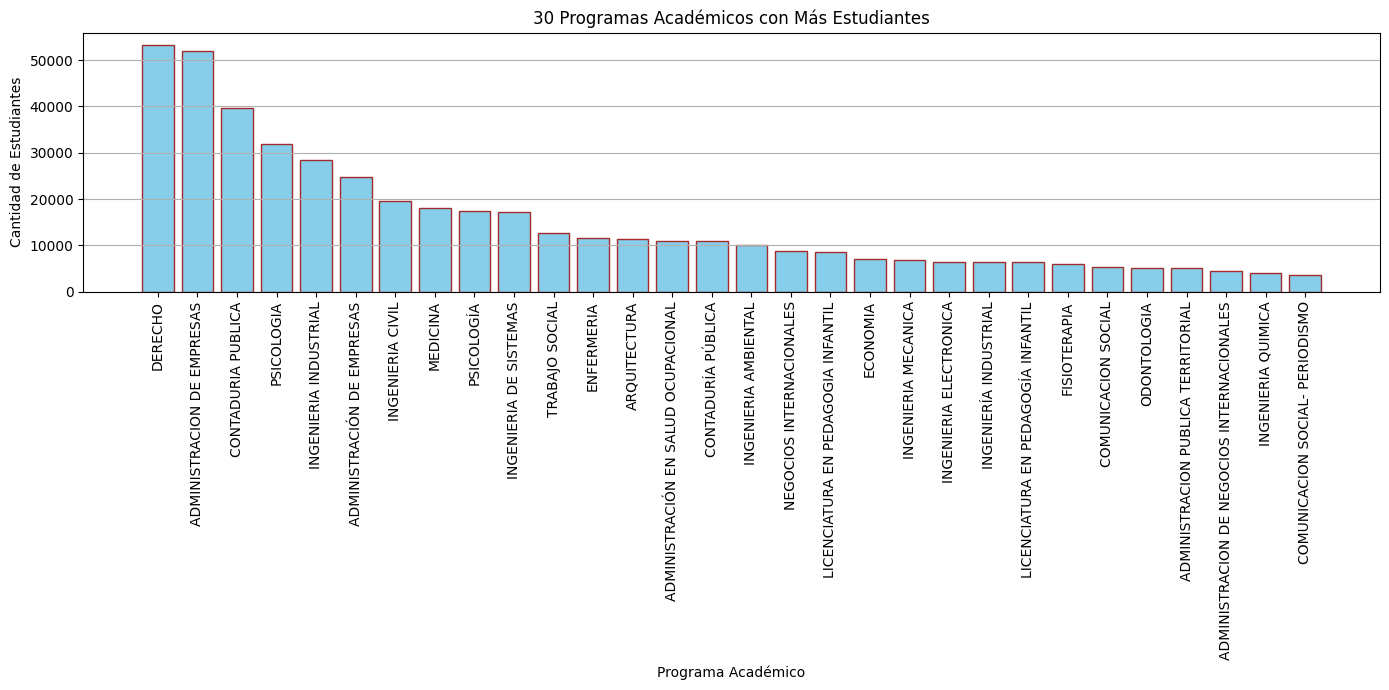

In [ ]:
programas_top30 = dtr["ESTU_PRGM_ACADEMICO"].value_counts().head(30)

plt.figure(figsize=(14, 7))  # Aumenta el tamaño para que quepan mejor
plt.bar(programas_top30.index, programas_top30.values, color='skyblue', edgecolor='brown')
plt.title("30 Programas Académicos con Más Estudiantes")
plt.xlabel("Programa Académico")
plt.ylabel("Cantidad de Estudiantes")

plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')

plt.show()



